## Blinkit Sales Analysis & Prediction

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Importing Dataset

In [4]:
df = pd.read_csv("blinkit_data.csv")

In [5]:
df.head()

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
0,Regular,FDX32,Fruits and Vegetables,2012,OUT049,Tier 1,Medium,Supermarket Type1,0.100014,15.10,145.4786,5.0
1,Low Fat,NCB42,Health and Hygiene,2022,OUT018,Tier 3,Medium,Supermarket Type2,0.008596,11.80,115.3492,5.0
2,Regular,FDR28,Frozen Foods,2010,OUT046,Tier 1,Small,Supermarket Type1,0.025896,13.85,165.0210,5.0
3,Regular,FDL50,Canned,2000,OUT013,Tier 3,High,Supermarket Type1,0.042278,12.15,126.5046,5.0
4,Low Fat,DRI25,Soft Drinks,2015,OUT045,Tier 2,Small,Supermarket Type1,0.033970,19.60,55.1614,5.0


In [6]:
print("Size of the dataset: ", df.shape)

Size of the dataset:  (8523, 12)


In [7]:
df.dtypes

Item Fat Content              object
Item Identifier               object
Item Type                     object
Outlet Establishment Year      int64
Outlet Identifier             object
Outlet Location Type          object
Outlet Size                   object
Outlet Type                   object
Item Visibility              float64
Item Weight                  float64
Sales                        float64
Rating                       float64
dtype: object

#### Statistics of Numerical Columns

In [9]:
df.describe()

,Outlet Establishment Year,Item Visibility,Item Weight,Sales,Rating
count,8523.000000,8523.000000,7060.000000,8523.000000,8523.000000
mean,2010.831867,0.066132,12.857645,140.992782,3.965857
std,8.371760,0.051598,4.643456,62.275067,0.605651
min,1998.000000,0.000000,4.555000,31.290000,1.000000
25%,2000.000000,0.026989,8.773750,93.826500,4.000000
50%,2012.000000,0.053931,12.600000,143.012800,4.000000
75%,2017.000000,0.094585,16.850000,185.643700,4.200000
max,2022.000000,0.328391,21.350000,266.888400,5.000000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item Fat Content           8523 non-null   object 
 1   Item Identifier            8523 non-null   object 
 2   Item Type                  8523 non-null   object 
 3   Outlet Establishment Year  8523 non-null   int64  
 4   Outlet Identifier          8523 non-null   object 
 5   Outlet Location Type       8523 non-null   object 
 6   Outlet Size                8523 non-null   object 
 7   Outlet Type                8523 non-null   object 
 8   Item Visibility            8523 non-null   float64
 9   Item Weight                7060 non-null   float64
 10  Sales                      8523 non-null   float64
 11  Rating                     8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [11]:
df.duplicated().sum()

0

#### Finding count of missing values

In [13]:
df.isna().sum().sort_values(ascending = False)

Item Weight                  1463
Item Fat Content                0
Item Identifier                 0
Item Type                       0
Outlet Establishment Year       0
Outlet Identifier               0
Outlet Location Type            0
Outlet Size                     0
Outlet Type                     0
Item Visibility                 0
Sales                           0
Rating                          0
dtype: int64

In [14]:
df[df["Item Weight"].isna()].head(10)

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
9,Low Fat,FDX25,Canned,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.101562,NaN,181.9292,5.0
10,LF,FDX21,Snack Foods,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.084555,NaN,109.8912,5.0
14,Low Fat,FDH19,Meat,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.032928,NaN,173.1738,5.0
18,Low Fat,FDJ56,Fruits and Vegetables,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.182515,NaN,98.7700,5.0
20,Regular,FDZ07,Fruits and Vegetables,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.000000,NaN,60.2194,5.0
21,Low Fat,NCK31,Others,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.026917,NaN,50.9666,5.0
27,Regular,FDO19,Fruits and Vegetables,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.016516,NaN,47.4034,5.0
41,Regular,FDQ08,Fruits and Vegetables,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.018839,NaN,62.9536,5.0
91,LF,NCQ38,Others,1998,OUT019,Tier 1,Small,Grocery Store,0.023403,NaN,108.2280,5.0
92,Low Fat,FDK02,Canned,1998,OUT019,Tier 1,Small,Grocery Store,0.196491,NaN,120.5440,5.0


#### Heatmap to visualize the correlation between numerical columns

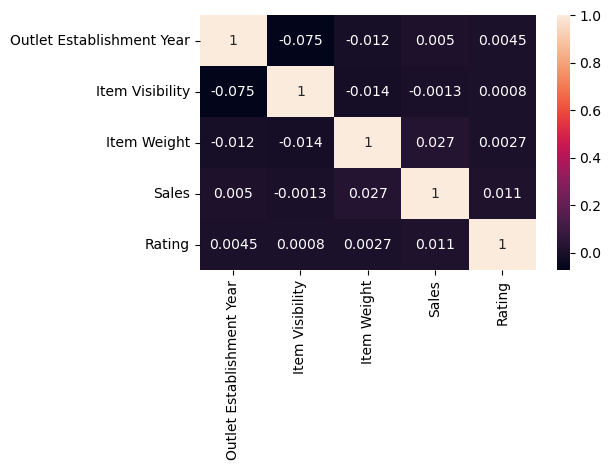

In [16]:
numeric_df = df.select_dtypes(include=["float64","int64"])
sns.heatmap(numeric_df.corr(), annot=True)
plt.tight_layout()
plt.show()

The numeric variables are not strongly correlated with each other. For the modelling process, Linear Regression will struggle
against the non-linear relationship. Hence, tree-based model will be more reliable because of its ability to capture non-linear trends.

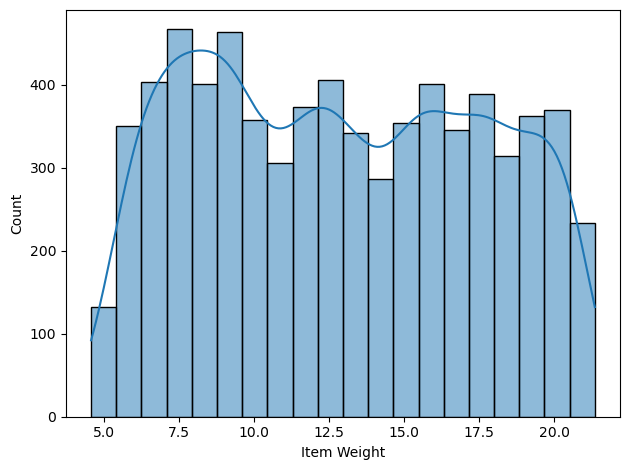

In [18]:
df["Item Weight"].skew()
sns.histplot(df["Item Weight"], kde=True)
plt.tight_layout()
plt.show()

Since the data is not normally distrubted perfectly and is slightly right skewed, median is used to imput the missing values
in "Item Weight" column to deal with the heavily influenced extreme values of the weight.

In [20]:
df["Item Weight"] = df["Item Weight"].fillna(df["Item Weight"].median())

In [21]:
df.isna().sum()

Item Fat Content             0
Item Identifier              0
Item Type                    0
Outlet Establishment Year    0
Outlet Identifier            0
Outlet Location Type         0
Outlet Size                  0
Outlet Type                  0
Item Visibility              0
Item Weight                  0
Sales                        0
Rating                       0
dtype: int64

In [22]:
df["Item Weight"].describe()

count    8523.00000
mean       12.81342
std         4.22724
min         4.55500
25%         9.31000
50%        12.60000
75%        16.00000
max        21.35000
Name: Item Weight, dtype: float64

In [23]:
#Rows with 0 item visibility
(df["Item Visibility"]==0).sum()

526

In [24]:
df[df["Item Visibility"]==0]["Sales"].describe()

count    526.000000
mean     138.117157
std       63.372908
min       32.890000
25%       89.242850
50%      130.248100
75%      184.383850
max      264.791000
Name: Sales, dtype: float64

Since the item visibility is 0 and the customers cannot see the product yet the mean sales is 138 with highest being 264. So these 0 item visibility are an invalid value and we need to replace & impute them.

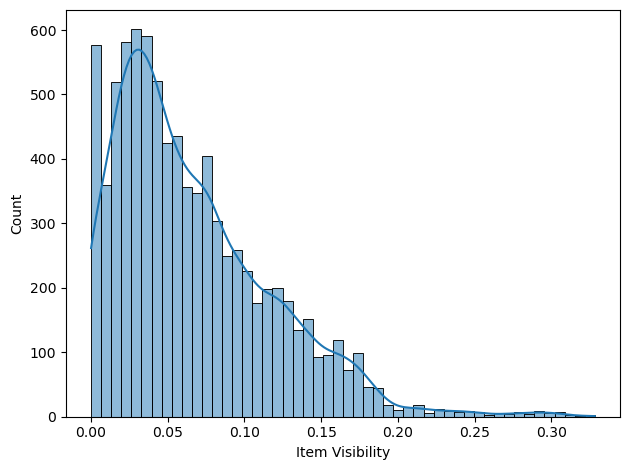

In [26]:
df["Item Visibility"].skew()
sns.histplot(df["Item Visibility"], kde=True)
plt.tight_layout()
plt.show()

Replacing 0 with nan and imputting them with mean of the each item type rather than global mean since the visibility is not the same across all the item types.

In [28]:
df.loc[df["Item Visibility"]==0, "Item Visibility"] = np.nan

In [29]:
df['Item Visibility'] = df.groupby('Item Type')['Item Visibility']\
                         .transform(lambda x: x.fillna(x.mean()))

In [30]:
(df["Item Visibility"]==0).sum()

0

In [31]:
df["Item Fat Content"].value_counts()

Item Fat Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64

#### Standardizing Item Fat content values

In [33]:
df["Item Fat Content"] = df["Item Fat Content"].replace({
    "LF" : "Low Fat",
    "low fat" : "Low Fat",
    "reg" : "Regular"
})

In [34]:
df["Item Fat Content"].value_counts()

Item Fat Content
Low Fat    5517
Regular    3006
Name: count, dtype: int64

In [35]:
df["Item Type"].value_counts()

Item Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: count, dtype: int64

In [36]:
df["Outlet Location Type"].value_counts()

Outlet Location Type
Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: count, dtype: int64

#### Visualizing the Counts of different values of Location Type

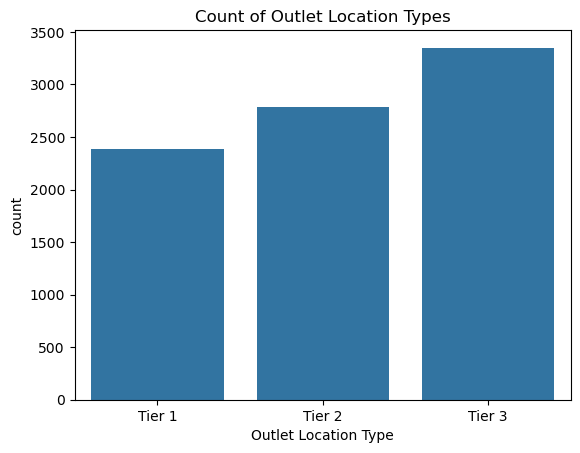

In [38]:
sns.countplot(x = "Outlet Location Type", data = df, order = ["Tier 1", "Tier 2", "Tier 3"])
plt.title("Count of Outlet Location Types")
plt.show()

#### Counts and Percentages of different values of Outlet Types

In [40]:
outlet_count = df["Outlet Type"].value_counts()
outlet_percentage = df["Outlet Type"].value_counts(normalize = True) * 100
outlet_summary = pd.DataFrame({
    "Outlet Count" : outlet_count,
    "Outlet Percentage" : outlet_percentage
})
print(outlet_summary)

                   Outlet Count  Outlet Percentage
Outlet Type                                       
Supermarket Type1          5577          65.434706
Grocery Store              1083          12.706793
Supermarket Type3           935          10.970316
Supermarket Type2           928          10.888185


In [41]:
print(df["Outlet Size"].unique())

['Medium' 'Small' 'High']


### Key Performance Indicators(KPIs)

In [43]:
#Total Sales
total_sales = df["Sales"].sum()
print(f"Total Sales: ${total_sales:,.1f}")

#Average Sales
avg_sales = df["Sales"].mean()
print(f"Average Revenue: ${avg_sales:,.1f}")

#No.of Items sold
items_sold = df["Item Type"].count()
print(f"Total Items Sold: {items_sold}")

#Average Ratings
avg_rating = df["Rating"].mean()
print(f"Average Rating: {avg_rating:.1f}")

Total Sales: $1,201,681.5
Average Revenue: $141.0
Total Items Sold: 8523
Average Rating: 4.0


## Exploratory Data Analysis (EDA)

#### Total Sales by Fat Content

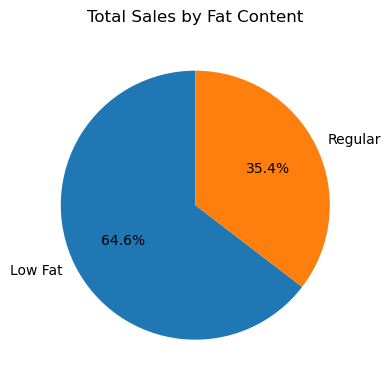

In [46]:
sales_by_fat = df.groupby("Item Fat Content")["Sales"].sum()
plt.figure(figsize=(4,4))
plt.pie(sales_by_fat, labels = sales_by_fat.index,
        autopct = "%.1f%%", startangle = 90)
plt.axis("equal")
plt.title("Total Sales by Fat Content")
plt.tight_layout()
plt.show()

#### No.of Items Sold by Fat Content

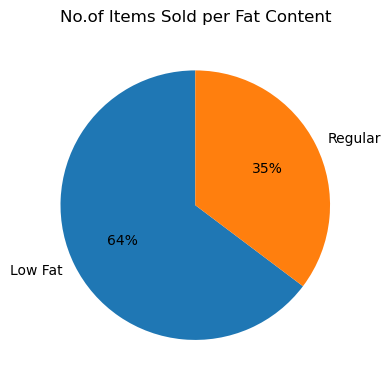

In [48]:
items_by_fat = df.groupby("Item Fat Content")["Item Type"].count()
plt.figure(figsize=(4,4))
plt.pie(items_by_fat, labels = items_by_fat.index,
        autopct = "%d%%", startangle = 90)
plt.axis("equal")
plt.title("No.of Items Sold per Fat Content")
plt.tight_layout()
plt.show()

#### Total Sales by Item Type

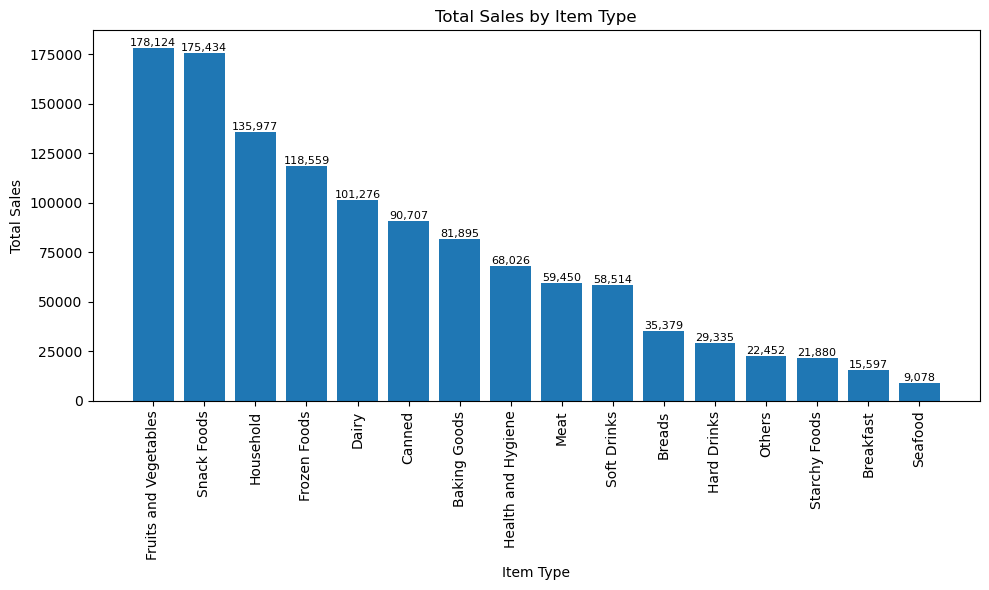

In [50]:
sales_by_item_type = df.groupby("Item Type")["Sales"].sum().sort_values(ascending = False)

plt.figure(figsize=(10,6))
bars = plt.bar(sales_by_item_type.index, sales_by_item_type.values)
plt.title("Total Sales by Item Type")
plt.xticks(rotation = 90)
plt.xlabel("Item Type")
plt.ylabel("Total Sales")

for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(),
             f"{bar.get_height():,.0f}", ha="center", va="bottom", fontsize=8)

plt.tight_layout() #To ensure clean and not overlapping output
plt.show()

#### Average Sales by Item Type

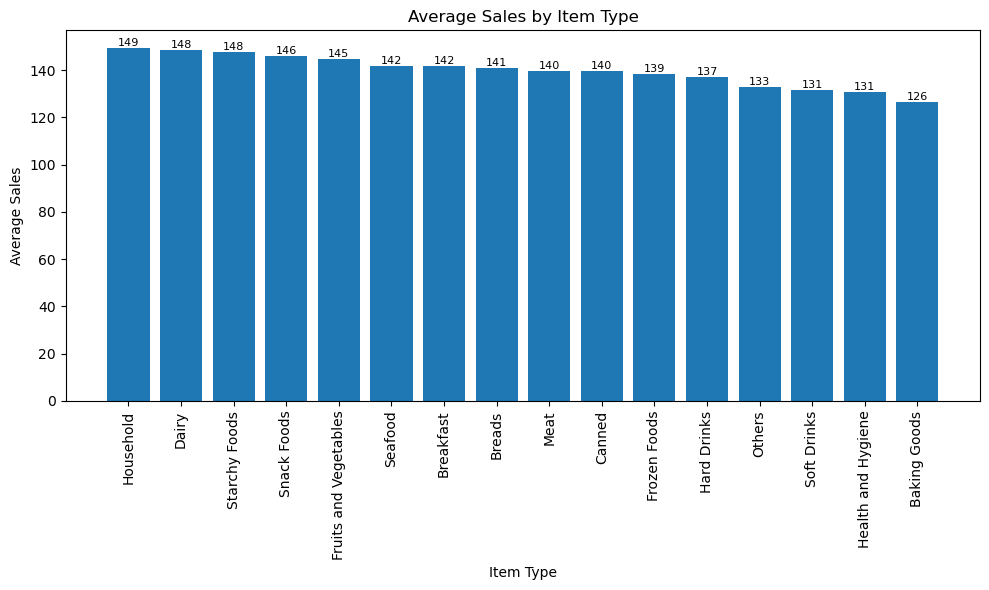

In [52]:
avg_item_type_sale = df.groupby("Item Type")["Sales"].mean().sort_values(ascending=False)
plt.figure(figsize=(10,6))
bars = plt.bar(avg_item_type_sale.index, avg_item_type_sale.values)
plt.title("Average Sales by Item Type")
plt.xticks(rotation = 90)
plt.xlabel("Item Type")
plt.ylabel("Average Sales")

for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(),
             f"{bar.get_height():,.0f}", ha="center", va="bottom", fontsize=8)

plt.tight_layout()
plt.show()

#### Item Fat Content vs Item Type

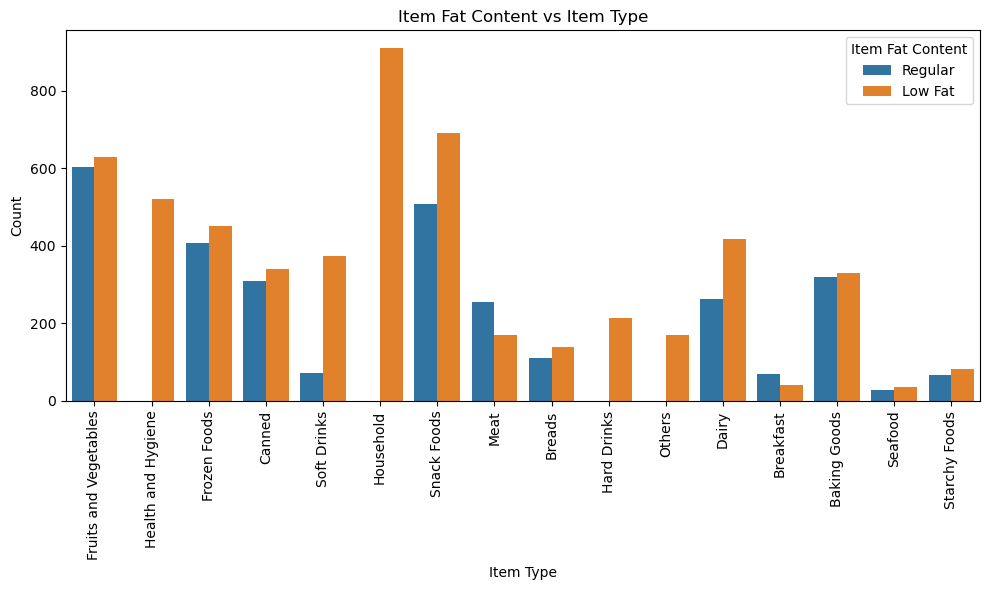

In [54]:
plt.figure(figsize=(10,6))
sns.countplot(x="Item Type", hue="Item Fat Content", data=df)
plt.title("Item Fat Content vs Item Type")
plt.xticks(rotation=90)
plt.xlabel("Item Type")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

#### Fat Content by Outlet for Total Sales

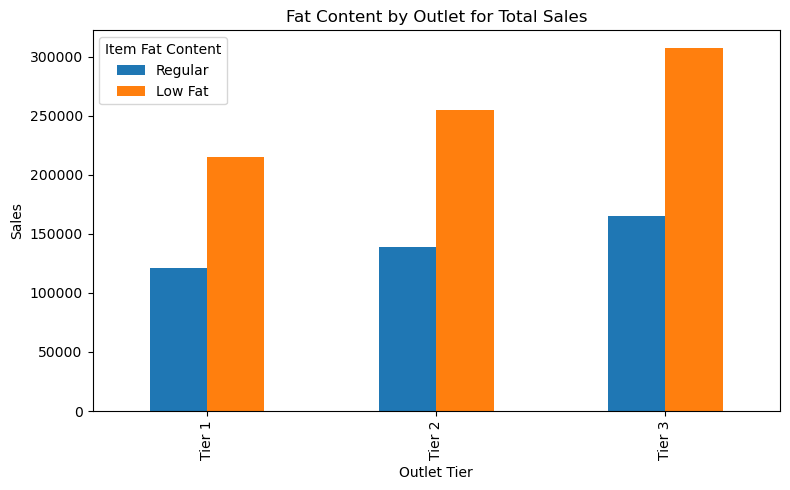

In [56]:
grouped = df.groupby(["Outlet Location Type", "Item Fat Content"])["Sales"].sum().unstack()
grouped = grouped[["Regular","Low Fat"]]

st_coln = grouped.plot(kind="bar", figsize=(8,5), title="Fat Content by Outlet for Total Sales")
plt.legend(title="Item Fat Content")
plt.xlabel("Outlet Tier")
plt.ylabel("Sales")
plt.tight_layout()
plt.show()

#### Total Sales by Outlet Establishment

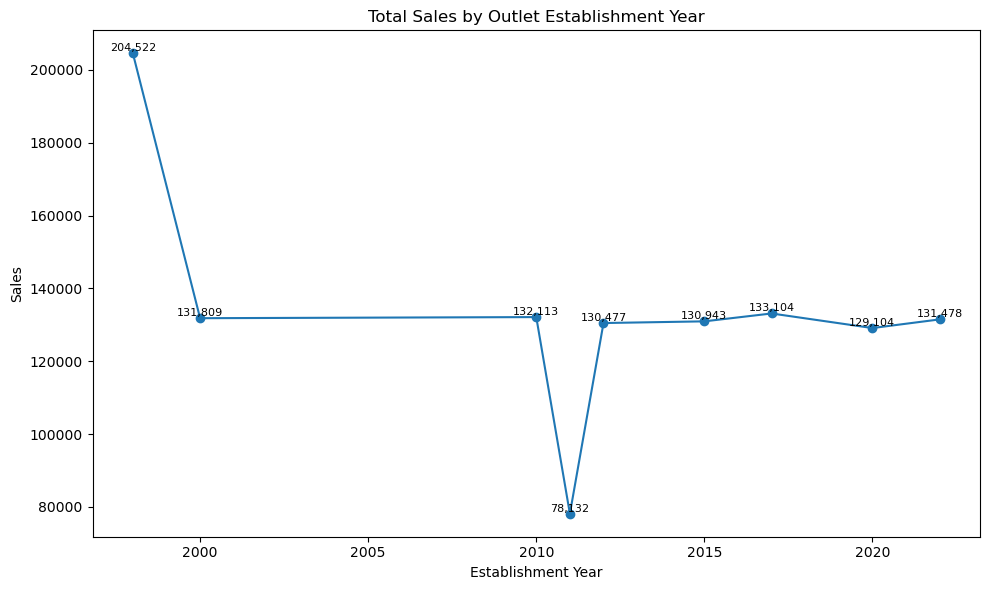

In [58]:
sales_by_year = df.groupby("Outlet Establishment Year")["Sales"].sum().sort_index()
plt.figure(figsize=(10,6))
plt.plot(sales_by_year.index, sales_by_year.values, marker="o", linestyle="-")
plt.xlabel("Establishment Year")
plt.ylabel("Sales")
plt.title("Total Sales by Outlet Establishment Year")

for x,y in zip(sales_by_year.index,sales_by_year.values):
    plt.text(x,y,f"{y:,.0f}", ha="center", va="bottom", fontsize=8)

plt.tight_layout()
plt.show()

#### Sales by Outlet Size

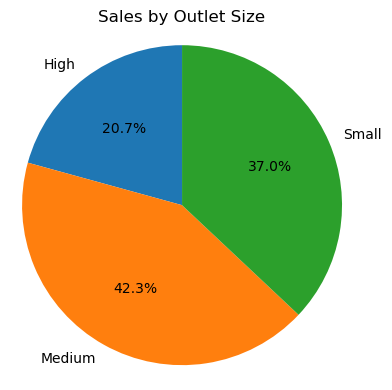

In [60]:
sales_by_size = df.groupby("Outlet Size")["Sales"].sum()
plt.figure(figsize=(4,4))
plt.pie(sales_by_size, labels=sales_by_size.index,
        autopct="%.1f%%", startangle=90)
plt.axis("equal")
plt.title("Sales by Outlet Size")
plt.tight_layout()
plt.show()

#### Sales by Outlet Location

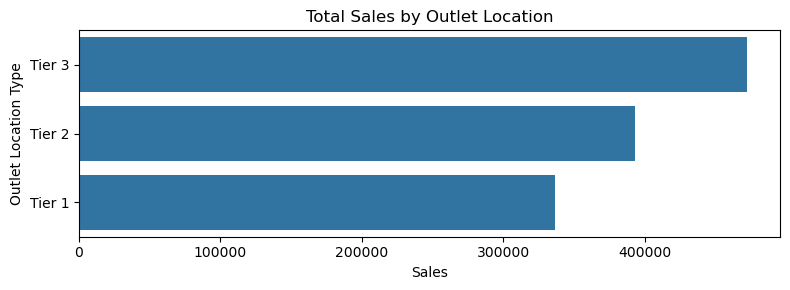

In [62]:
sales_by_location = df.groupby("Outlet Location Type")["Sales"].sum().reset_index()
sales_by_location = sales_by_location.sort_values('Sales', ascending=False)

plt.figure(figsize=(8,3))
ax = sns.barplot(x="Sales",y="Outlet Location Type", data=sales_by_location)
plt.title("Total Sales by Outlet Location")
plt.xlabel("Sales")
plt.ylabel("Outlet Location Type")
plt.tight_layout()
plt.show()

#### Does Rating Impact Sales ?

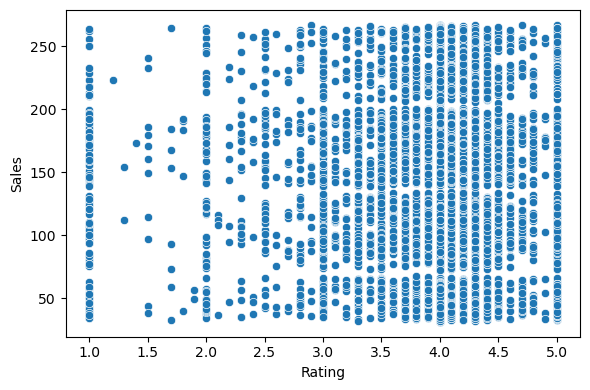

In [64]:
plt.figure(figsize=(6,4))
sns.scatterplot(x= df["Rating"], y= df["Sales"], data= df)
plt.tight_layout()
plt.show()

#### Visibility vs Sales

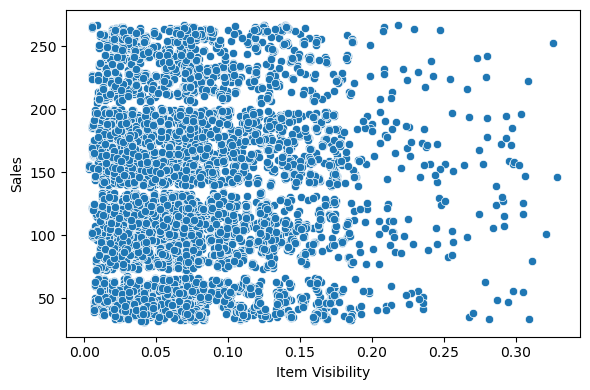

In [66]:
plt.figure(figsize=(6,4))
sns.scatterplot(x= df["Item Visibility"], y= df["Sales"], data= df)
plt.tight_layout()
plt.show()

In [67]:
df.columns

Index(['Item Fat Content', 'Item Identifier', 'Item Type',
       'Outlet Establishment Year', 'Outlet Identifier',
       'Outlet Location Type', 'Outlet Size', 'Outlet Type', 'Item Visibility',
       'Item Weight', 'Sales', 'Rating'],
      dtype='object')

#### Statistical ANOVA Analysis to check whether Item Types significantly affects Sales

Null Hypothesis : Average sales are same across all Item Types.
Alternate Hypothesis : At least one Item Type has different average sales.

In [70]:
from scipy.stats import f_oneway
groups = [group["Sales"].values for name,group in df.groupby("Item Type")]

f_stat, p_value = f_oneway(*groups)
print(f"F-Statistic: {f_stat:.3f}")
print(f"p-value: {p_value:.3f}")

F-Statistic: 7.162
p-value: 0.000


With p<0.05, we accept alternate hypothesis that at least one Item Type has different average sales.

#### Post-Hoc Analysis

In [73]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
tukey = pairwise_tukeyhsd(endog=df["Sales"],
                          groups=df["Item Type"],
                          alpha=0.05
                         )
print(tukey)

C:\Users\Shreyas S\anaconda3\Lib\site-packages\scipy\integrate\_quadpack_py.py:1272: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


                Multiple Comparison of Means - Tukey HSD, FWER=0.05                
        group1                group2        meandiff p-adj   lower    upper  reject
-----------------------------------------------------------------------------------
         Baking Goods                Breads  14.5719 0.1094  -1.2097 30.3535  False
         Baking Goods             Breakfast  15.4074 0.5383  -6.4827 37.2974  False
         Baking Goods                Canned  13.3831 0.0098   1.5946 25.1715   True
         Baking Goods                 Dairy  22.1184    0.0  10.4734 33.7635   True
         Baking Goods          Frozen Foods  12.1226 0.0161   1.0692  23.176   True
         Baking Goods Fruits and Vegetables  18.2005    0.0   7.8994 28.5015   True
         Baking Goods           Hard Drinks  10.6972 0.7041   -6.039 27.4333  False
         Baking Goods    Health and Hygiene   4.4382  0.998  -8.0595 16.9358  False
         Baking Goods             Household   23.044    0.0  12.1328 33.9552

The Tukey HSD test identified several statistically significant differences in sales between item categories.
High-performing categories include Dairy, Fruits & Vegetables, Household items, Snack Foods, and Starchy Foods, which consistently show higher average sales.
Lower-performing categories include Baking Goods, Health & Hygiene, and Soft Drinks, which frequently show significantly lower sales compared to other categories.
This confirms that product category plays a crucial role in retail sales performance.

#### Blinkit should prioritize inventory, promotions, and shelf space for high-performing food categories while reassessing strategy for low-performing categories such as Baking Goods and Soft Drinks.

#### Statistical ANOVA Analysis to check whether Outlet Type significantly affects Sales

Null Hypothesis: The mean of sales is same across all outlet types
Alternate Hypothesis: Atleast one of the groups has different mean sales

In [77]:
groups_1 = [group["Sales"].values for name,group in df.groupby("Outlet Type")]
f_stat , p_value = f_oneway(*groups_1)
print(f"F-Statistic: {f_stat:.3f}")
print(f"p-value: {p_value:.3f}")

F-Statistic: 0.220
p-value: 0.882


Since p>0.05, we fail to reject null hypothesis and accept that the mean of sales is same across all outlet types.

#### Visualizing the total sales across outlet types

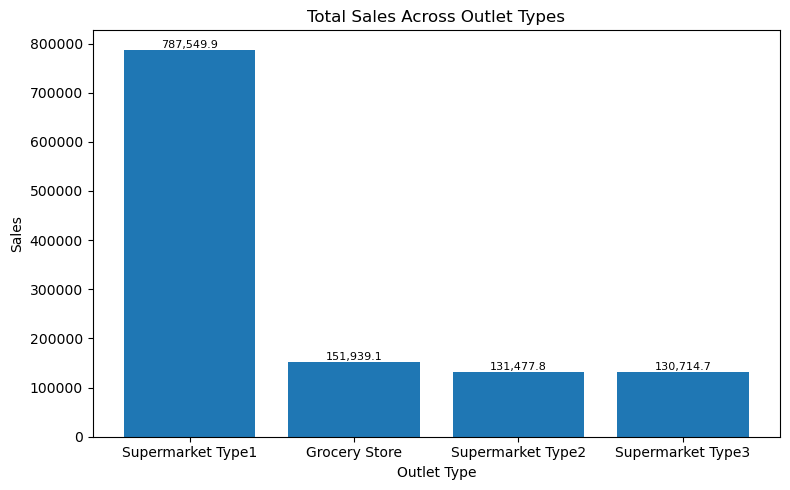

In [80]:
type_sales = df.groupby("Outlet Type")["Sales"].sum().sort_values(ascending=False)
plt.figure(figsize=(8,5))
bars = plt.bar(type_sales.index, type_sales.values)
plt.title("Total Sales Across Outlet Types")
plt.xlabel("Outlet Type")
plt.ylabel("Sales")

for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(),
             f"{bar.get_height():,.1f}", ha="center", va="bottom", fontsize=8)

plt.tight_layout()
plt.show()

Even though ANOVA test showed that the average sales across all the outlet types are the same, the above visualization displays that the total sales
across the outlet types are varying with the Supermarket Type 1 generating nearly 5-6 times more revenue than the other outlet types.
This indicates more product variety and customer footfall in Supermarket Type 1 leading to higher revenue.

#### Blinkit should prioritize expansion of Supermarket Type 1 across different locations as they are primary drivers of higher revenue.

## Feature Engineering

In [84]:
df.head()

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
0,Regular,FDX32,Fruits and Vegetables,2012,OUT049,Tier 1,Medium,Supermarket Type1,0.100014,15.10,145.4786,5.0
1,Low Fat,NCB42,Health and Hygiene,2022,OUT018,Tier 3,Medium,Supermarket Type2,0.008596,11.80,115.3492,5.0
2,Regular,FDR28,Frozen Foods,2010,OUT046,Tier 1,Small,Supermarket Type1,0.025896,13.85,165.0210,5.0
3,Regular,FDL50,Canned,2000,OUT013,Tier 3,High,Supermarket Type1,0.042278,12.15,126.5046,5.0
4,Low Fat,DRI25,Soft Drinks,2015,OUT045,Tier 2,Small,Supermarket Type1,0.033970,19.60,55.1614,5.0


Creating Outlet Age column to capture how old each outlet is from 2024 which will enable the model to know the older stores vs newer stores and to capture any patterns with the sales.

In [86]:
#Lets consider the max/most recent outlet establishment year in the dataset
df["Outlet Establishment Year"].max()

2022

In [87]:
df["Outlet Age"] = 2022 - df["Outlet Establishment Year"]
df.drop("Outlet Establishment Year", axis=1, inplace=True)

In [88]:
df.head()

,Item Fat Content,Item Identifier,Item Type,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating,Outlet Age
0,Regular,FDX32,Fruits and Vegetables,OUT049,Tier 1,Medium,Supermarket Type1,0.100014,15.10,145.4786,5.0,10
1,Low Fat,NCB42,Health and Hygiene,OUT018,Tier 3,Medium,Supermarket Type2,0.008596,11.80,115.3492,5.0,0
2,Regular,FDR28,Frozen Foods,OUT046,Tier 1,Small,Supermarket Type1,0.025896,13.85,165.0210,5.0,12
3,Regular,FDL50,Canned,OUT013,Tier 3,High,Supermarket Type1,0.042278,12.15,126.5046,5.0,22
4,Low Fat,DRI25,Soft Drinks,OUT045,Tier 2,Small,Supermarket Type1,0.033970,19.60,55.1614,5.0,7


Creating Item Visibilty Ratio to see average visibility of each item within the category to see are they above or below the average visibility improving model interpretability.

In [90]:
avg_visibility = df.groupby("Item Type")["Item Visibility"].transform('mean')
df["Item Visibility Ratio"] = df["Item Visibility"]/avg_visibility

In [91]:
df.tail()

,Item Fat Content,Item Identifier,Item Type,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating,Outlet Age,Item Visibility Ratio
8518,Low Fat,NCT53,Health and Hygiene,OUT027,Tier 3,Medium,Supermarket Type3,0.058958,12.6,164.5526,4.0,24,1.000000
8519,Low Fat,FDN09,Snack Foods,OUT027,Tier 3,Medium,Supermarket Type3,0.034706,12.6,241.6828,4.0,24,0.489739
8520,Low Fat,DRE13,Soft Drinks,OUT027,Tier 3,Medium,Supermarket Type3,0.027571,12.6,86.6198,4.0,24,0.398054
8521,Regular,FDT50,Dairy,OUT027,Tier 3,Medium,Supermarket Type3,0.107715,12.6,97.8752,4.0,24,1.404350
8522,Regular,FDM58,Snack Foods,OUT027,Tier 3,Medium,Supermarket Type3,0.070866,12.6,112.2544,4.0,24,1.000000


Store Tier having combine value of Size and Location Type will capture interaction effect

In [93]:
df["Store Tier"] = df["Outlet Size"] + "_" + df["Outlet Location Type"]

Since the Item Identifier's first 2 character code indicate the type of item like FD for food, DR for drinks; so its better to extract them rather than having entire identifier for the modelling purpose.

In [95]:
df["Item Identifier Type"] = df["Item Identifier"].str[:2]

In [96]:
df.head()

,Item Fat Content,Item Identifier,Item Type,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating,Outlet Age,Item Visibility Ratio,Store Tier,Item Identifier Type
0,Regular,FDX32,Fruits and Vegetables,OUT049,Tier 1,Medium,Supermarket Type1,0.100014,15.10,145.4786,5.0,10,1.356690,Medium_Tier 1,FD
1,Low Fat,NCB42,Health and Hygiene,OUT018,Tier 3,Medium,Supermarket Type2,0.008596,11.80,115.3492,5.0,0,0.145801,Medium_Tier 3,NC
2,Regular,FDR28,Frozen Foods,OUT046,Tier 1,Small,Supermarket Type1,0.025896,13.85,165.0210,5.0,12,0.370988,Small_Tier 1,FD
3,Regular,FDL50,Canned,OUT013,Tier 3,High,Supermarket Type1,0.042278,12.15,126.5046,5.0,22,0.589000,High_Tier 3,FD
4,Low Fat,DRI25,Soft Drinks,OUT045,Tier 2,Small,Supermarket Type1,0.033970,19.60,55.1614,5.0,7,0.490443,Small_Tier 2,DR


In [97]:
df.drop(["Item Identifier","Outlet Identifier"], axis=1, inplace=True)

Interaction terms and new features are added without the removal of base features like Size, Location Type to allow model to learn from both the features. 

In [99]:
df.shape

(8523, 13)

## Model Building

In [101]:
X = df.drop("Sales", axis=1) #Input Features
y = df["Sales"] #Target Feature

In [102]:
cat_col = X.select_dtypes(include="object").columns
num_col = X.select_dtypes(exclude="object").columns

In [103]:
cat_col

Index(['Item Fat Content', 'Item Type', 'Outlet Location Type', 'Outlet Size',
       'Outlet Type', 'Store Tier', 'Item Identifier Type'],
      dtype='object')

In [104]:
num_col

Index(['Item Visibility', 'Item Weight', 'Rating', 'Outlet Age',
       'Item Visibility Ratio'],
      dtype='object')

#### One-hot Encoding is done to convert categorical columns to numerical ones to enable the models to handle the features well.

In [106]:
X = pd.get_dummies(X, columns=cat_col, drop_first=True)

In [107]:
X.shape

(8523, 37)

Dividing the data into train and test

In [109]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

#### Baseline Linear Regression Model

In [192]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)
prediction_lr = lr.predict(X_test)

#### Random Forest

In [195]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, random_state=44)
rf.fit(X_train,y_train)
prediction_rf = rf.predict(X_test)

#### Gradient Boosting

In [197]:
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor(random_state=44)
gb.fit(X_train,y_train)
prediction_gb = gb.predict(X_test)

#### Evaluation Metrics for Regression problem

In [208]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

def evaluate(y_test, pred, model_name):
    r2 = round(r2_score(y_test, pred),2)
    mae = round(mean_absolute_error(y_test, pred),2)
    rmse = round(np.sqrt(mean_squared_error(y_test, pred)),2)
    
    print(model_name)
    print("R2:", r2)
    print("Mean Absolute Error:", mae)
    print("Root Mean Squared Error:", rmse)
    print("------")

evaluate(y_test, prediction_lr, "Linear Regression")
evaluate(y_test, prediction_rf, "Random Forest")
evaluate(y_test, prediction_gb, "Gradient Boosting")

Linear Regression
R2: 0.02
Mean Absolute Error: 52.31
Root Mean Squared Error: 62.31
------
Random Forest
R2: 0.54
Mean Absolute Error: 31.31
Root Mean Squared Error: 42.57
------
Gradient Boosting
R2: 0.12
Mean Absolute Error: 49.43
Root Mean Squared Error: 59.12
------


Linear Regression performly badly because it is well suited to handle linear relationships in the data. However as noticed in the heatmap earlier, there was little to none correlation between the numerical variables indicating the presence of some non-linear relationship in the data.

## Feature Importance

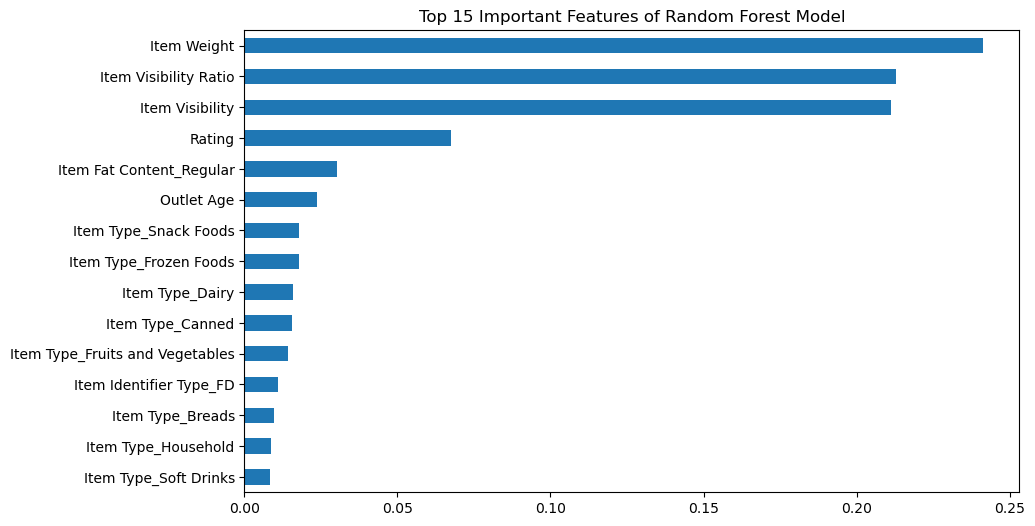

In [205]:
importance = pd.Series(rf.feature_importances_, index=X.columns)
importance = importance.sort_values(ascending=False)
plt.figure(figsize=(10,6))
importance.head(15).plot(kind="barh")
plt.title("Top 15 Important Features of Random Forest Model")
plt.gca().invert_yaxis()
plt.show()

Random Forest clearly outperformed other linear models with a R2 score of 0.54.
Feature importance depicts Item Weight, Item Visibility, Rating, Regular Fat Content and product categories are the key drivers behind the sales indicating more the weight and more visibility of the products will help ehnance the sales.
This confirms retail sales depend on shelf placement, product characteristics and category demand.

## KEY INSIGHTS

#### 1. Supermarket 1 contributes to the highest sales overall, exceeding other outlet types - likely due to higher customer footfall and more prioritization.
#### 2. As revealed by ANOVA Analysis, item category significantly impact the sales with Dairy, Fruits & Vegetables, Household, Snack Foods being the high-performing groups while low-performing include Baking Goods, Health & Hygiene, Soft Drinks.
#### 3. Item Visibility and Item Visibility Ratio are the key drivers of the sales as revealed in the Random Forest Feature Importance suggesting more exposure and shelf placement are critical.
#### 4. Outlet Age also appears amongst key drivers indicating the older outlets tends to get more customers as the years pass by probably due to the loyalty of the customers.